In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import sounddevice as sd


# TRABAJO PRÁCTICO 2 - MIGUEL VALDÉS

## 1.1 Generación de Señales

Generaremos a partir de la siguiente señal continua 

$$ x(t)=\sin(2\pi f_0t)+\cos(2\pi f_1 t) $$

donde $f_0=2 Hz.$ y $ f_1=3f_0$

**1.** Implemente una función def  $x(t)$ que devuelve los valores de  $x(t)$ de una lista de valores en formato numpy.

In [2]:
f0=2
f1=3*f0

def x(t):
    return np.sin(2*np.pi*2*t)+np.cos(2*np.pi*6*t)

**2.** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0}=1000 Hz$ sobre $N_0=1024$ muestras:
   
* Genere un arreglo  de  muestras temporales de valores $t=\frac{n}{f_{s0}}$

* Evalue la función $x$  en el vector de tiempo  $t_0$ y almacene los valores resultantes $x[n]$  en un vector $x_0$ .

* Trace la señal con el eje de tiempo correcto en segundos


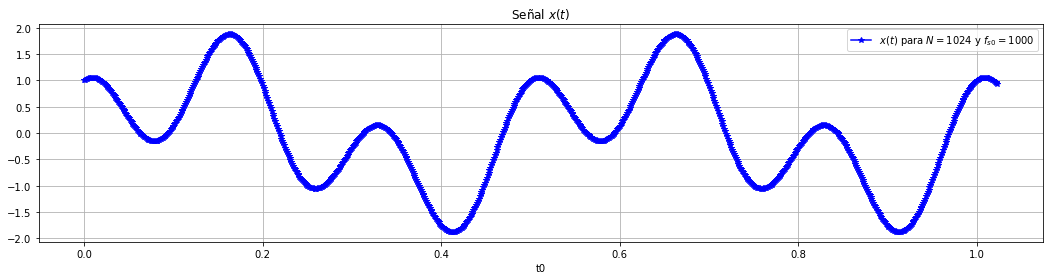

In [15]:
N = 2**10 #1024
fs0 = 1000

t0 = np.arange(0,N/fs0,1/fs0)

x0 = x(t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(t0,x0,'b-*', label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.legend()
ax.set_title('Señal $x(t)$')
ax.set_xlabel('t0');
ax.grid()

**3.** Genere una señal $x_n$ con frecuencia de muestreo $f_s=20$ sobre $N=f_s$ muestras (muestreo de 1 segundo).

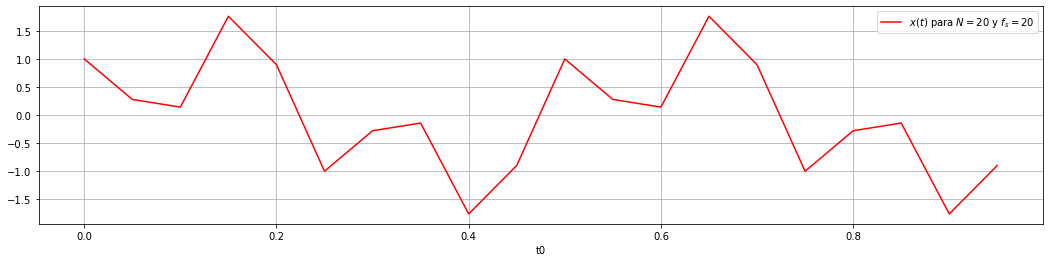

In [4]:
fs=20
tn = np.arange(0,1,1/fs)

xn = x(tn)
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(tn,xn, 'r-', label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.legend()
ax.set_xlabel('t0');
ax.grid()

**4.** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$ use el estilo de trazado "-o" para ver la posición de las muestras.

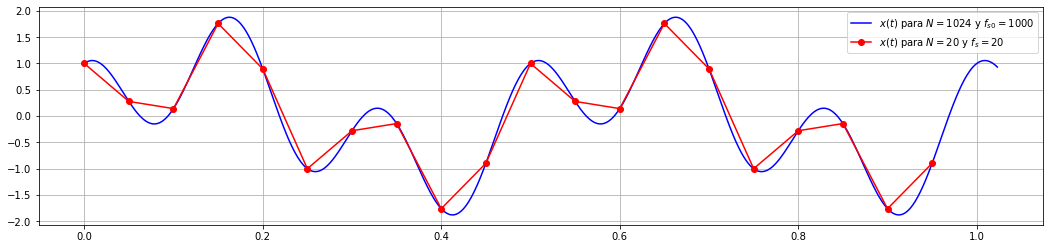

In [5]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(t0,x0,'b-',label = '$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.plot(tn,xn, 'r-o', label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.legend()
ax.grid()

# 1.2 Reconstrucción de señales

**1.** ¿Cuál es la frecuencia de muestreo necesaria $f_s$ para garantizar que la señal $x(t)$ pueda reconstruirse?

*Solución:*

Calculamos la transformada de Fourier de nuestra señal $x(t)=\sin(4\pi t)+\cos(12 \pi  t)$ 

$$\widehat{x}(\omega)= i\pi \left[\delta (\omega + 4\pi)-\delta(\omega - 4\pi)\right] + \pi \left[\delta (\omega -12\pi)+\delta (\omega +12\pi)\right]$$

Luego para poder aplicar el Teorema de reconstrucción de Shannon-Nyquist se necesita que el soporte de $\widehat{x}(\omega)$ sea compacto y esté dentro de $\left[ -\pi/T , \pi/T \right]$ con $T$ la distancia de las muestras.
Observamos que en nuestro caso, el soporte es $[-12\pi , 12\pi]$, de lo que se sigue $\pi/T  = \pi \cdot f_s =12 \pi$.

Por lo tanto $f_s=12 Hz$ es la frecuencia de muestreo necesaria para garantizar la reconstrucción de la señal.


**2.** Programe una función def recSinc $(x_s,t_s,f_s,t)$ que reconstruya una señal en el tiempo $t$ a partir de muestras $x_s,t_s$ a la frecuencia $f_s$.

In [6]:
def recSinc(xs,ts,fs,t):
    rec=[]
    for i in t:
        np.array(rec.append(np.sum(xs*np.sinc(np.pi*fs*(i-ts)))))
    return rec

**3.** Grafique simultáneamente $x_0$ y la interpolación de $x_n$ en $t_0$. ¿Qué pasa en el borde de la ventana de muestreo?

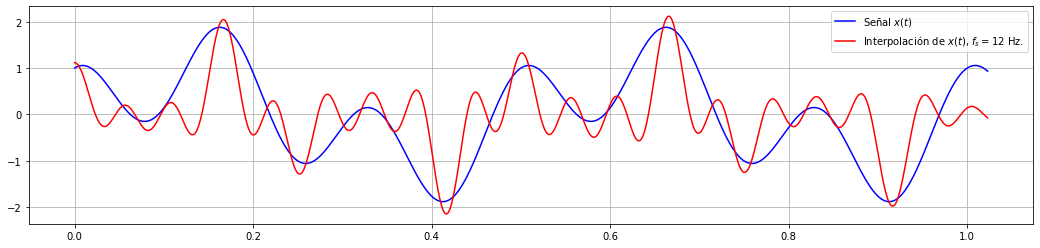

In [27]:
f_s = 12 #frec que garantiza la reconstrucción de la señal
t_n = np.arange(0,1,1/f_s)
x_n = x(t_n) 

fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(t0,x0,'b-',label = 'Señal $x(t)$')
ax.plot(t0,recSinc(x_n,t_n,f_s,t0), 'r-', label='Interpolación de $x(t)$, $f_s=12$ Hz.')
ax.legend()
ax.grid()

Notamos que la interpolación se aproxima de muy buena manera a la señal, logrando seguir las subidas y bajadas que tiene. Notar que mientras mayor sea la frecuencia de muestreo, será mucho mas exacta la interpolación. 
En los bordes podemos notar que la interpolación prevee que luego del la subida vendrá una bajada en la señal, por lo que intenta "suavizarla".

**4.** Modifique la frecuencia de muestreo de $f_s=20$ a $f_s=10$. ¿Qué sucede con la reconstrucción?.

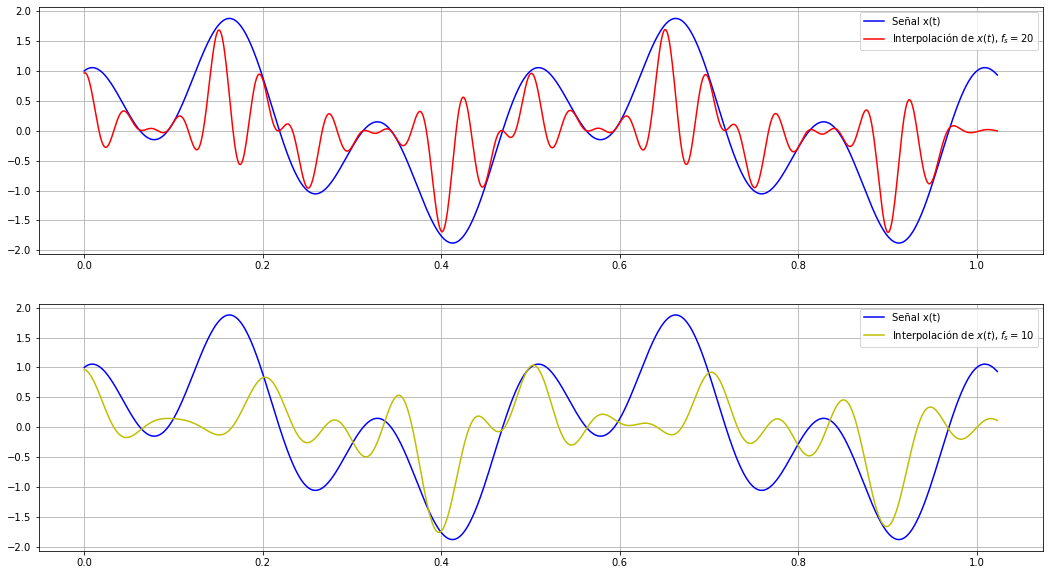

In [8]:
f_20=20
t_20=np.arange(0,1,1/f_20)
x_20=x(t_20)

f_10=10
t_10=np.arange(0,1,1/f_10)
x_10=x(t_10)

fig, ax = plt.subplots(2,1,figsize=(18,10))

o1 = ax[0].plot(t0,x0,'b-', label = 'Señal x(t)')
o1 = ax[0].plot(t0,recSinc(x_20,t_20,f_20,t0),'r-',label = 'Interpolación de $x(t)$, $f_s = 20$')
ax[0].legend()
ax[0].grid()

o2 = ax[1].plot(t0,x0,'b-', label = 'Señal x(t)')
o2 = ax[1].plot(t0,recSinc(x_10,t_10,f_10,t0),'y-',label = 'Interpolación de $x(t)$, $f_s = 10$')
ax[1].legend()
ax[1].grid();


Cuando se toma una frecuencia de 10 Hz se ve una interpolación (reconstrucción) menos exacta, esto es ya que se suman menos senos cardinales y por tanto pasa por alto algunas subidas y bajadas. Por otro lado, tomando la frecuencia de 20 Hz, la interpolación es mucho mas acorde a las subidas y bajadas que tiene la señal, esto puesto que existe una mayor suma de senos cardinales.

# 1.3 Generación de señales de audio

En esta parte trabajaremos con secuencias de audio. Para hacer eso usaremos spicy.io.wavefile para cargar  y guardar archivos en formato .wav. También es posible escuchar audio directamente en Python usando la librería de manipulación audio sounddevice que se puede instar con pip o conda. En esta sección las señales generadas solo serán escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en la siguiente sección

**1.** Genere 1 segundo de una onda sinusoidal de magnitud 0.5 y de frecuencia $f_0=425 Hz$ muestreada a $f_s=8000 Hz$. Guárdelo como un archivo wave y escuche el archivo o escuche directamente la señal desde python. Este es el tono marcado de los teléfonos europeos.

In [28]:
A = 0.5
f_0 = 425
f_s = 8000
t = np.arange(0,1,1/f_s)

señal = np.array(A*np.sin(2*np.pi*f_0*t))  
#guardamos el archivo en formato.wav
tono_eu = waves.write("tono_eu.wav",f_s,señal.astype(np.int16)) 
#reproducimos el sonido
sd.play(señal,f_s)
sd.wait()
        
    

**2.** Es posible generar notas musicales a partir de su número MIDI $m$ donde la frecuencia se expresa como 

$$f_m=440 \cdot 2^{\frac{m-69}{12}}$$
        
Vemos que hay 12 semitonos para pasar de una nota a su octava.

La nota MIDI $m=69$ es LA 4 en notación y es el estándar de todo utilizado para afinar instrumentos para conciertos.

La lista de notas y sus correspondientes nombres y frecuencias puede encontrarse en linea.

Implemente una función def getNote(m,fs,l) que devuelve la nota $m$ tocada durante $l$ segundos a la frecuecia $f_s$

In [10]:
def getNote(m,fs,l):
    t = np.arange(0,l,1/fs)
    x_fm = np.sin(2*np.pi*440*2**((m-69)/12)*t)
    #se reproduce la señal creada
    sd.play(x_fm,fs)
    sd.wait()
    return x_fm;

**3.** Guarde la nota $m=69$ en un archivo llamado "A4.wav". Escuche varias otras notas MIDI ¿Qué pasa para $m=117$ (LA 8) cuando se guarda a la frecuencia de muestreo $f_s=8000 Hz$?.

In [11]:
A4 = waves.write("A4.wav", f_s,getNote(69,8000,1).astype(np.int16)) 
LA8 =  waves.write("LA8.wav", f_s,getNote(117,8000,1).astype(np.int16))

**4.** Codifique una secuencia de concatenación de notas $[70,72,68,56,63]$ (1 seg. cada una) y guarde la secuencia como un archivo "seq.wav". ¿Le suena la secuencia?

In [14]:
seq = waves.write("seq.wav",f_s,np.concatenate([getNote(m,f_s,1) for m in [70,72,68,56,63]]).astype(np.int16))

No me suena a nada conocido:(

**5.** La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto de la saturación puede ser reproducido usando un "clipeo" en un seno.

Compare la señal de la nota $m=69$ a $440 Hz$ para diferentes valores de recorte. Guarde la nota usando el "clipeo" en un archivo "A4clip.wav". ¿Cuál es el efecto de la saturación en el contenido frecuencial de la señal?.

no entendí como hacer esto:(

**6.** Genere la señal

 $$x(t)=\sin\left[ 2\pi \left(\omega_0 t + \frac{c}{2}t^2\right)\right]$$
 
con $f_0=100 Hz$ y $c=500$ durante 1 seg a una frecuencia de muestreo $f_s=8000Hz$. Esta señal es llamada "chirp" y corresponde a una modulación de frecuencia. Guarde la señal en el archivo "chirp.wav".

In [29]:
f_0 = 100
f_s = 8000
c = 500
t = np.arange(0,1,1/f_s)
x_t = np.sin(2*np.pi*(2*np.pi*f_0*t+c/2*t**2))
chirp = waves.write("chirp.wav",f_s,x_t.astype(np.int16))
sd.play(x_t,f_s)
sd.wait()